## EDA for KIVA Loan

- day 21

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

Deskripsi kolom: 
Berikut adalah deskripsi dari masing-masing kolom:
- `id`: Unique ID untuk masing-masing loan (loan ID)
- `funded_amount`: Jumlah yang dicairkan oleh Kiva ke agen (USD)
- `loan_amount`: Jumlah yang disalurkan oleh agen ke peminjam (USD)
    + Keterangan tambahan:
    - loan_amount adalah jumlah dana yang dibutuhkan oleh borrower (peminjam).
    - funded_amount biasanya sama atau lebih kecil dari loan_amount:
        - Sama: Jika seluruh jumlah yang dibutuhkan berhasil terkumpul
        - Lebih kecil: Jika belum seluruhnya terkumpul, tetapi Kiva memutuskan tetap mendistribusikan sebagian yang sudah terkumpul.

-  `activity`: Kategori lebih spesifik dari `sector`
-  `sector`: Kategori dari loan
-  `country`: Nama negara lengkap, tempat pinjaman dicairkan
- `region`: Nama wilayah lengkap dari `country`
- `currency`: Mata uang
- `partner_id`: ID untuk organisasi partner
- `posted_time`: Waktu pinjaman di-posting di Kiva oleh agen
- `funded_time`: Waktu pinjaman telah sepenuhnya dibiayai oleh pemberi pinjaman
- `term_in_months`: Durasi pencairan pinjaman (dalam satuan bulan)
- `lender_count`: Banyaknya peminjam yang berkontribusi
- `repayment_interval`: Cara pelunasan peminjaman



POV
- Saat ini Anda diminta untuk menganalisa data kiva ini karena perusahaan Anda ingin masuk sebagai pendana pada kiva ini. Perusahaan Anda berada di Indonesia dan atasan Anda ingin tau kesempatan apa yang bisa diberikan kepada Kiva dan mengetahui resikonya untuk menjadi pendana seperti apa.

In [3]:
df = pd.read_csv('kiva_loan.csv')
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

yg msh kosong: use, region, partner_id, funded_time

In [5]:
df.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
funded_time           48331
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [6]:
# drop partner id yg kosong krn kurang terpercaya kalau tanpa partner
df.dropna(subset= ['partner_id'], inplace = True)
df.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    3808
country                   0
region                43293
currency                  0
partner_id                0
posted_time               0
funded_time           46176
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657698 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  657698 non-null  int64  
 1   funded_amount       657698 non-null  float64
 2   loan_amount         657698 non-null  float64
 3   activity            657698 non-null  object 
 4   sector              657698 non-null  object 
 5   use                 653890 non-null  object 
 6   country             657698 non-null  object 
 7   region              614405 non-null  object 
 8   currency            657698 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         657698 non-null  object 
 11  funded_time         611522 non-null  object 
 12  term_in_months      657698 non-null  float64
 13  lender_count        657698 non-null  int64  
 14  repayment_interval  657698 non-null  object 
dtypes: float64(4), int64(2), object(9)
memo

In [8]:
df.tail()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,NaN,13.0,0,monthly
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-26 02:09:43+00:00,13.0,1,monthly
671202,1340334,0.0,25.0,Games,Entertainment,NaN,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,NaN,13.0,0,monthly
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,NaN,13.0,0,monthly
671204,1340339,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:31:46+00:00,NaN,13.0,0,monthly


In [9]:
# ganti dtype posted time menjadi datetime64[ns]
df['posted_time'] = pd.to_datetime(df['posted_time'])


In [10]:
df.tail()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,NaN,13.0,0,monthly
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-26 02:09:43+00:00,13.0,1,monthly
671202,1340334,0.0,25.0,Games,Entertainment,NaN,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,NaN,13.0,0,monthly
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,NaN,13.0,0,monthly
671204,1340339,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:31:46+00:00,NaN,13.0,0,monthly


In [11]:
df.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    3808
country                   0
region                43293
currency                  0
partner_id                0
posted_time               0
funded_time           46176
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [12]:
df.tail()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,NaN,13.0,0,monthly
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-26 02:09:43+00:00,13.0,1,monthly
671202,1340334,0.0,25.0,Games,Entertainment,NaN,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,NaN,13.0,0,monthly
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,NaN,13.0,0,monthly
671204,1340339,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:31:46+00:00,NaN,13.0,0,monthly


In [13]:
# funded time dibiarkan kosong tetapi diganti dtype menjadi datetime
# tidak ubah data tp NaN jadi diabaikan
df['funded_time'] = pd.to_datetime(df['funded_time'], errors ='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657698 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  657698 non-null  int64              
 1   funded_amount       657698 non-null  float64            
 2   loan_amount         657698 non-null  float64            
 3   activity            657698 non-null  object             
 4   sector              657698 non-null  object             
 5   use                 653890 non-null  object             
 6   country             657698 non-null  object             
 7   region              614405 non-null  object             
 8   currency            657698 non-null  object             
 9   partner_id          657698 non-null  float64            
 10  posted_time         657698 non-null  datetime64[ns, UTC]
 11  funded_time         611522 non-null  datetime64[ns, UTC]
 12  term_in_months      6

In [15]:
df.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    3808
country                   0
region                43293
currency                  0
partner_id                0
posted_time               0
funded_time           46176
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [16]:
df['sector'].unique()

array(['Food', 'Transportation', 'Arts', 'Agriculture', 'Services',
       'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction',
       'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment'],
      dtype=object)

In [17]:
df[df['sector'] == 'Agriculture'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 178158 entries, 6 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  178158 non-null  int64              
 1   funded_amount       178158 non-null  float64            
 2   loan_amount         178158 non-null  float64            
 3   activity            178158 non-null  object             
 4   sector              178158 non-null  object             
 5   use                 177166 non-null  object             
 6   country             178158 non-null  object             
 7   region              169444 non-null  object             
 8   currency            178158 non-null  object             
 9   partner_id          178158 non-null  float64            
 10  posted_time         178158 non-null  datetime64[ns, UTC]
 11  funded_time         164435 non-null  datetime64[ns, UTC]
 12  term_in_months      1

In [18]:
# ganti activity, sector, country, currency, repayment_interval menjadi dt category
cat_cols = ['activity','sector','country','currency','repayment_interval']
df[cat_cols] = df[cat_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657698 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  657698 non-null  int64              
 1   funded_amount       657698 non-null  float64            
 2   loan_amount         657698 non-null  float64            
 3   activity            657698 non-null  category           
 4   sector              657698 non-null  category           
 5   use                 653890 non-null  object             
 6   country             657698 non-null  category           
 7   region              614405 non-null  object             
 8   currency            657698 non-null  category           
 9   partner_id          657698 non-null  float64            
 10  posted_time         657698 non-null  datetime64[ns, UTC]
 11  funded_time         611522 non-null  datetime64[ns, UTC]
 12  term_in_months      6

In [19]:
df_terpenuhi = df[df['funded_amount'] == df['loan_amount']]
df_terpenuhi.groupby(['sector'])[['lender_count']].sum().sort_values(by='lender_count', ascending=False)

,lender_count
sector,
Agriculture,3536638
Food,2483972
Retail,1960132
Services,943060
Education,882238
Clothing,722781
Housing,593273
Personal Use,410392
Arts,304591


In [20]:
#pilih agriculture krn bidang yg familiar
# berdasarkan lender count merupakan sektor yang paling banyak menyerap/menarik donatur
df_agr = df[df['sector'] == 'Agriculture']
df_agr.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2014-01-01 17:18:09+00:00,43.0,8,bullet
14,653075,225.0,225.0,Poultry,Agriculture,to expand her existing poultry farm business.,India,Dhupguri,INR,334.0,2014-01-01 11:24:40+00:00,2014-01-01 18:58:18+00:00,43.0,7,bullet
25,653074,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Dhupguri,INR,334.0,2014-01-01 11:13:09+00:00,2014-01-01 19:01:19+00:00,43.0,9,bullet
28,653071,125.0,125.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Maynaguri,INR,334.0,2014-01-01 10:35:20+00:00,2014-01-01 16:06:47+00:00,43.0,5,bullet
29,653073,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizer for fa...,India,Dhupguri,INR,334.0,2014-01-01 11:09:26+00:00,2014-01-01 21:47:05+00:00,43.0,10,bullet


In [21]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178158 entries, 6 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  178158 non-null  int64              
 1   funded_amount       178158 non-null  float64            
 2   loan_amount         178158 non-null  float64            
 3   activity            178158 non-null  category           
 4   sector              178158 non-null  category           
 5   use                 177166 non-null  object             
 6   country             178158 non-null  category           
 7   region              169444 non-null  object             
 8   currency            178158 non-null  category           
 9   partner_id          178158 non-null  float64            
 10  posted_time         178158 non-null  datetime64[ns, UTC]
 11  funded_time         164435 non-null  datetime64[ns, UTC]
 12  term_in_months      1

In [22]:
# cek duplikat
df_agr.duplicated().sum()

0

In [55]:
df.to_csv('kiva_loan_clean.csv')

-----

In [23]:
df_agr['AGR_terpenuhi']= df_agr['funded_amount'] == df_agr['loan_amount']
df_agr

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,AGR_terpenuhi
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2014-01-01 17:18:09+00:00,43.0,8,bullet,True
14,653075,225.0,225.0,Poultry,Agriculture,to expand her existing poultry farm business.,India,Dhupguri,INR,334.0,2014-01-01 11:24:40+00:00,2014-01-01 18:58:18+00:00,43.0,7,bullet,True
25,653074,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Dhupguri,INR,334.0,2014-01-01 11:13:09+00:00,2014-01-01 19:01:19+00:00,43.0,9,bullet,True
28,653071,125.0,125.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Maynaguri,INR,334.0,2014-01-01 10:35:20+00:00,2014-01-01 16:06:47+00:00,43.0,5,bullet,True
29,653073,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizer for fa...,India,Dhupguri,INR,334.0,2014-01-01 11:09:26+00:00,2014-01-01 21:47:05+00:00,43.0,10,bullet,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671199,1340318,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 06:45:02+00:00,NaT,13.0,0,monthly,False
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,NaT,13.0,0,monthly,False
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-26 02:09:43+00:00,13.0,1,monthly,True
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,NaT,13.0,0,monthly,False


In [24]:
df_agr.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,1.781580e+05,178158.000000,178158.000000,178158.000000,178158.000000,178158.000000
mean,9.946022e+05,734.635127,784.289226,184.753707,14.394302,20.968522
std,1.964937e+05,982.563964,1014.168064,91.357316,7.726193,28.605841
min,6.530670e+05,0.000000,25.000000,9.000000,2.000000,0.000000
25%,8.302690e+05,275.000000,275.000000,138.000000,10.000000,8.000000
50%,9.911445e+05,500.000000,500.000000,161.000000,14.000000,14.000000
75%,1.166942e+06,925.000000,1000.000000,204.000000,14.000000,26.000000
max,1.340339e+06,100000.000000,100000.000000,533.000000,144.000000,2986.000000


In [25]:
df_agr.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,AGR_terpenuhi
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2014-01-01 17:18:09+00:00,43.0,8,bullet,True
14,653075,225.0,225.0,Poultry,Agriculture,to expand her existing poultry farm business.,India,Dhupguri,INR,334.0,2014-01-01 11:24:40+00:00,2014-01-01 18:58:18+00:00,43.0,7,bullet,True
25,653074,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Dhupguri,INR,334.0,2014-01-01 11:13:09+00:00,2014-01-01 19:01:19+00:00,43.0,9,bullet,True
28,653071,125.0,125.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Maynaguri,INR,334.0,2014-01-01 10:35:20+00:00,2014-01-01 16:06:47+00:00,43.0,5,bullet,True
29,653073,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizer for fa...,India,Dhupguri,INR,334.0,2014-01-01 11:09:26+00:00,2014-01-01 21:47:05+00:00,43.0,10,bullet,True


# question 
1. apakah sektor agriculture layak diberikan loan?
    - dengan melihat berapa case yg terpenuhi dan tidak terpenuhi (funded_amount == loan_amount )
    - answer = sektor agriculture layak diberikan loan krn case terpenuhi (loan amount == funded amount) lebih banyak dibandingkan case tdk terpenuhi
2. Top 5 activity by lender count 
    - menunjukkan aktivitas yg paling banyak menarik donatur pada sektor agriculture
3. cara pelunasan yang paling sering digunakan di sektor agriculture
4. distribusi pengajuan pinjaman(posted time) dan pendanaan pinjaman (funded_time)
5. top 5/top10 countries yg paling banyak menerima pinjaman pd sektor agriculture


In [26]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178158 entries, 6 to 671204
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  178158 non-null  int64              
 1   funded_amount       178158 non-null  float64            
 2   loan_amount         178158 non-null  float64            
 3   activity            178158 non-null  category           
 4   sector              178158 non-null  category           
 5   use                 177166 non-null  object             
 6   country             178158 non-null  category           
 7   region              169444 non-null  object             
 8   currency            178158 non-null  category           
 9   partner_id          178158 non-null  float64            
 10  posted_time         178158 non-null  datetime64[ns, UTC]
 11  funded_time         164435 non-null  datetime64[ns, UTC]
 12  term_in_months      1

In [27]:
df_agr['AGR_terpenuhi'] = df_agr['AGR_terpenuhi'].astype('category')
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178158 entries, 6 to 671204
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  178158 non-null  int64              
 1   funded_amount       178158 non-null  float64            
 2   loan_amount         178158 non-null  float64            
 3   activity            178158 non-null  category           
 4   sector              178158 non-null  category           
 5   use                 177166 non-null  object             
 6   country             178158 non-null  category           
 7   region              169444 non-null  object             
 8   currency            178158 non-null  category           
 9   partner_id          178158 non-null  float64            
 10  posted_time         178158 non-null  datetime64[ns, UTC]
 11  funded_time         164435 non-null  datetime64[ns, UTC]
 12  term_in_months      1

In [28]:
# Q1 jumlah case yg terpenuhi loan amountnya
a = df_agr.groupby(by='AGR_terpenuhi')[['id']].count()
a

,id
AGR_terpenuhi,
False,13723
True,164435


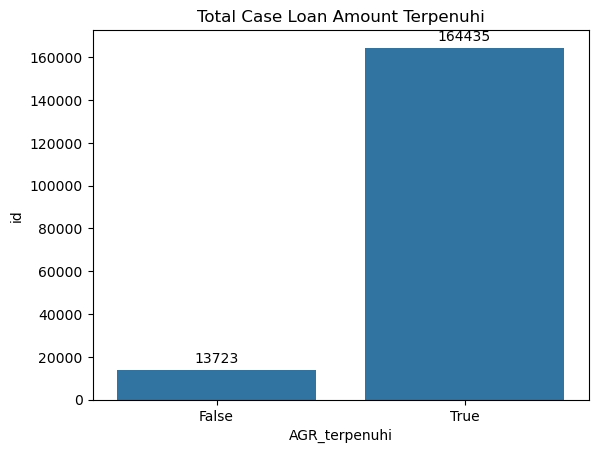

In [29]:
fig= sns.barplot(data = a, x = 'AGR_terpenuhi', y = 'id')
plt.title('Total Case Loan Amount Terpenuhi')
for container in fig.containers:
    fig.bar_label(container, padding = 3)

insight:
 - dari total case pada sektor agriculture diketahui bahwa jumlah case yang loan amountnya terpenuhi (True) lebih banyak dibandingkan dengan case yang loan amount tidak terpenuhi (False)
 - dengan jumlah case yang terpenuhi lebih banyak maka sektor agriculture layak untuk diberikan pinjaman

In [30]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)


In [31]:
df_agr.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,AGR_terpenuhi
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2014-01-01 17:18:09+00:00,43.0,8,bullet,True
14,653075,225.0,225.0,Poultry,Agriculture,to expand her existing poultry farm business.,India,Dhupguri,INR,334.0,2014-01-01 11:24:40+00:00,2014-01-01 18:58:18+00:00,43.0,7,bullet,True
25,653074,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Dhupguri,INR,334.0,2014-01-01 11:13:09+00:00,2014-01-01 19:01:19+00:00,43.0,9,bullet,True
28,653071,125.0,125.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Maynaguri,INR,334.0,2014-01-01 10:35:20+00:00,2014-01-01 16:06:47+00:00,43.0,5,bullet,True
29,653073,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizer for fa...,India,Dhupguri,INR,334.0,2014-01-01 11:09:26+00:00,2014-01-01 21:47:05+00:00,43.0,10,bullet,True


In [32]:
# Q2 Top 5 activity by lender count 
top5 = df_agr.groupby('activity')[['lender_count']].count().sort_values('lender_count', ascending=False).reset_index().head(5)
top5

,activity,lender_count
0,Farming,72955
1,Pigs,26624
2,Agriculture,24879
3,Livestock,13095
4,Poultry,9783


In [33]:
top5['activity'] = top5['activity'].cat.remove_unused_categories()

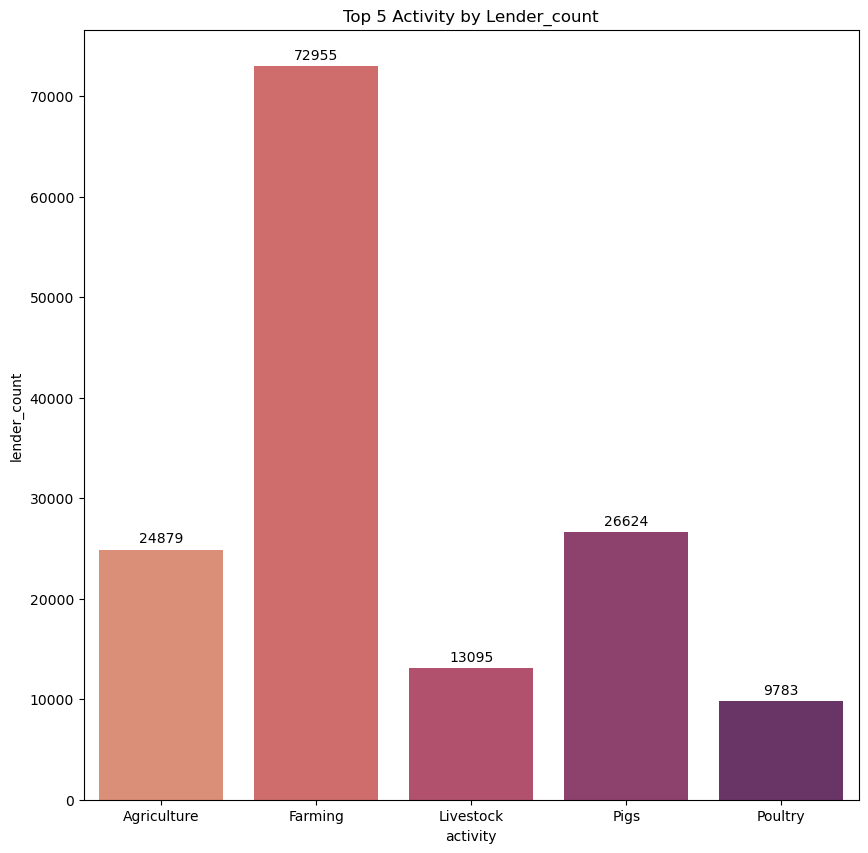

In [34]:
plt.figure(figsize=(10,10))
fig= sns.barplot(data = top5, x = 'activity', y = 'lender_count', palette= 'flare')
plt.title('Top 5 Activity by Lender_count')
for container in fig.containers:
    fig.bar_label(container, padding = 3)

insight:
- aktivitas yang paling banyak menarik donatur pada sektor agriculture adalah aktivitas Farming dengan jumlah case sebanyak 72955 case

In [35]:
df_agr['country'].mode()

0    Philippines
Name: country, dtype: category
Categories (84, object): ['Afghanistan', 'Albania', 'Armenia', 'Azerbaijan', ..., 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

In [36]:
df_agr[df_agr['repayment_interval'] == 'bullet']

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,AGR_terpenuhi
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2014-01-01 17:18:09+00:00,43.0,8,bullet,True
14,653075,225.0,225.0,Poultry,Agriculture,to expand her existing poultry farm business.,India,Dhupguri,INR,334.0,2014-01-01 11:24:40+00:00,2014-01-01 18:58:18+00:00,43.0,7,bullet,True
25,653074,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Dhupguri,INR,334.0,2014-01-01 11:13:09+00:00,2014-01-01 19:01:19+00:00,43.0,9,bullet,True
28,653071,125.0,125.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Maynaguri,INR,334.0,2014-01-01 10:35:20+00:00,2014-01-01 16:06:47+00:00,43.0,5,bullet,True
29,653073,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizer for fa...,India,Dhupguri,INR,334.0,2014-01-01 11:09:26+00:00,2014-01-01 21:47:05+00:00,43.0,10,bullet,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671077,1338404,75.0,925.0,Agriculture,Agriculture,buy manure and fertilizer and pay his workers.,Peru,Santo Tomás - Cutervo - Cajamarca,PEN,143.0,2017-07-12 15:24:31+00:00,NaT,14.0,3,bullet,False
671081,1338488,0.0,350.0,Pigs,Agriculture,to buy more pigs and commercial feed to fatten...,Colombia,San Andrés de Sotavento,COP,177.0,2017-07-12 16:27:10+00:00,NaT,12.0,0,bullet,False
671082,1338497,25.0,1000.0,Pigs,Agriculture,purchase more piglets and concentrate to feed ...,Colombia,Valencia,COP,177.0,2017-07-12 16:34:25+00:00,NaT,20.0,1,bullet,False
671095,1338416,75.0,450.0,Agriculture,Agriculture,Rosa to buy agricultural inputs to grow basic ...,El Salvador,San Miguel,USD,199.0,2017-07-12 15:38:29+00:00,NaT,12.0,3,bullet,False


In [37]:
df_agr['repayment_interval'].mode()

0    monthly
Name: repayment_interval, dtype: category
Categories (3, object): ['bullet', 'irregular', 'monthly']

In [38]:
# Q3 cara pelunasan yg paling sering digunakan 
caralunas = df_agr.groupby(by='repayment_interval')[['id']].count()
caralunas

,id
repayment_interval,
bullet,43803
irregular,46990
monthly,87365


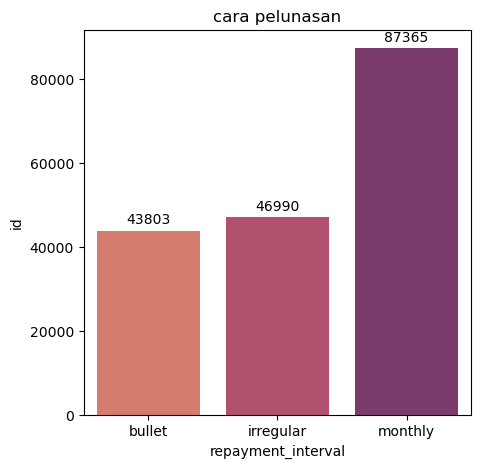

In [39]:
plt.figure(figsize=(5,5))
fig= sns.barplot(data = caralunas, x = 'repayment_interval', y = 'id', palette= 'flare')
plt.title('cara pelunasan')
for container in fig.containers:
    fig.bar_label(container, padding = 3)

insight:
- cara pelunasan yang paling sering digunakan pada sektor pertanian adalah cara pelunasan dengan interval monthly atau dibayarkan setiap bulan dengan jumlah case sebesar 87365, yang paling jarang digunakan adalah cara bullet dengan jumlah case sebesar 43803.


In [40]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178158 entries, 6 to 671204
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  178158 non-null  int64              
 1   funded_amount       178158 non-null  float64            
 2   loan_amount         178158 non-null  float64            
 3   activity            178158 non-null  category           
 4   sector              178158 non-null  category           
 5   use                 177166 non-null  object             
 6   country             178158 non-null  category           
 7   region              169444 non-null  object             
 8   currency            178158 non-null  category           
 9   partner_id          178158 non-null  float64            
 10  posted_time         178158 non-null  datetime64[ns, UTC]
 11  funded_time         164435 non-null  datetime64[ns, UTC]
 12  term_in_months      1

In [41]:
df_agr.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,AGR_terpenuhi
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2014-01-01 17:18:09+00:00,43.0,8,bullet,True
14,653075,225.0,225.0,Poultry,Agriculture,to expand her existing poultry farm business.,India,Dhupguri,INR,334.0,2014-01-01 11:24:40+00:00,2014-01-01 18:58:18+00:00,43.0,7,bullet,True
25,653074,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Dhupguri,INR,334.0,2014-01-01 11:13:09+00:00,2014-01-01 19:01:19+00:00,43.0,9,bullet,True
28,653071,125.0,125.0,Farming,Agriculture,to purchase potato seeds and fertilizers for g...,India,Maynaguri,INR,334.0,2014-01-01 10:35:20+00:00,2014-01-01 16:06:47+00:00,43.0,5,bullet,True
29,653073,250.0,250.0,Farming,Agriculture,to purchase potato seeds and fertilizer for fa...,India,Dhupguri,INR,334.0,2014-01-01 11:09:26+00:00,2014-01-01 21:47:05+00:00,43.0,10,bullet,True


In [42]:
# Q4 posted and funded time analysis
df_agr['posted_month'] = df_agr['posted_time'].dt.month_name()
df_agr['funded_month'] = df_agr['funded_time'].dt.month_name()

In [43]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178158 entries, 6 to 671204
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  178158 non-null  int64              
 1   funded_amount       178158 non-null  float64            
 2   loan_amount         178158 non-null  float64            
 3   activity            178158 non-null  category           
 4   sector              178158 non-null  category           
 5   use                 177166 non-null  object             
 6   country             178158 non-null  category           
 7   region              169444 non-null  object             
 8   currency            178158 non-null  category           
 9   partner_id          178158 non-null  float64            
 10  posted_time         178158 non-null  datetime64[ns, UTC]
 11  funded_time         164435 non-null  datetime64[ns, UTC]
 12  term_in_months      1

In [44]:
df_agr.tail()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,AGR_terpenuhi,posted_month,funded_month
671199,1340318,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 06:45:02+00:00,NaT,13.0,0,monthly,False,July,NaN
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,NaT,13.0,0,monthly,False,July,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-26 02:09:43+00:00,13.0,1,monthly,True,July,July
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,NaT,13.0,0,monthly,False,July,NaN
671204,1340339,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:31:46+00:00,NaT,13.0,0,monthly,False,July,NaN


In [45]:
# hitung jumlah pinjaman per bulan di sektor agri
posted = df_agr['posted_month'].value_counts()
posted

posted_month
May          19546
March        19543
June         18448
April        17694
February     15619
July         14507
January      14345
November     12325
August       12060
September    11582
October      11417
December     11072
Name: count, dtype: int64

In [46]:
funded = df_agr['funded_month'].value_counts()

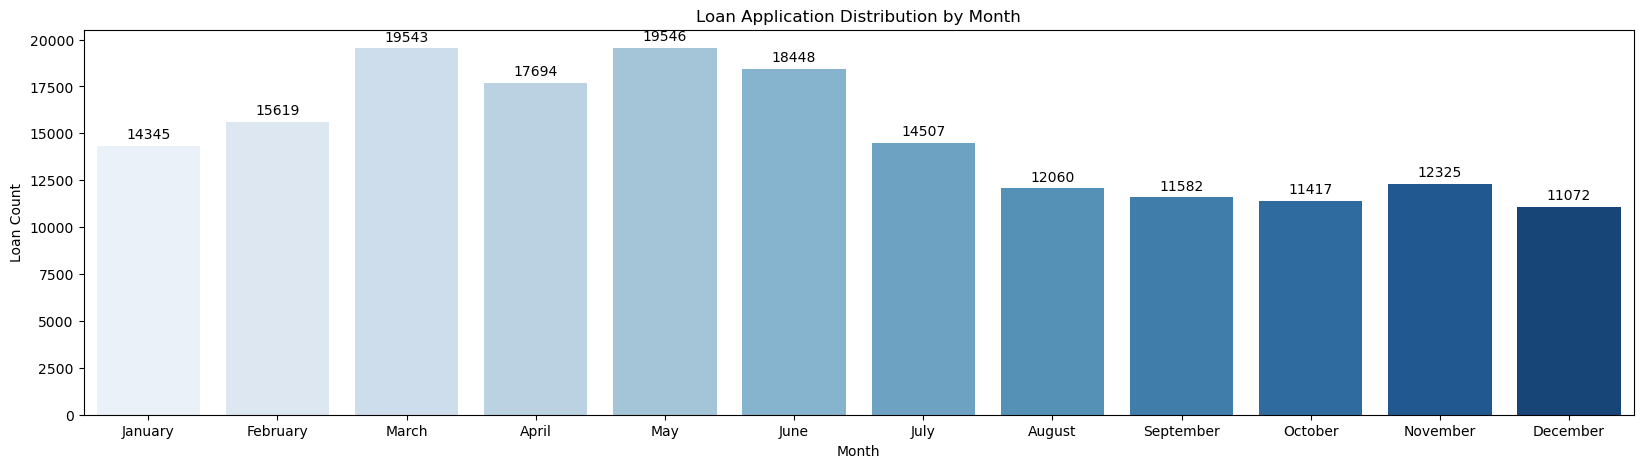

In [47]:
# posted loan
plt.figure(figsize=(20, 5))
fig= sns.barplot( x= posted.index, y=posted.values, palette="Blues",  order= ['January', 'February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Loan Count')
plt.title('Loan Application Distribution by Month')
for container in fig.containers:
    fig.bar_label(container, padding = 3)

insight:
- puncak pinjaman terjadi pada bulan Maret, May, dan June. hal ini menunjukkan bahwa musim dengan pinjaman terbanyak dimulai dari Maret hingga May. 
- dapat berkaitan dengan dimulainya musim tanam
- terdapat perbedaan jumlah case pinjaman yang cukup besar antara bulan tertinggi Maret (19543) dengan bulan terrendah Desember (11072)


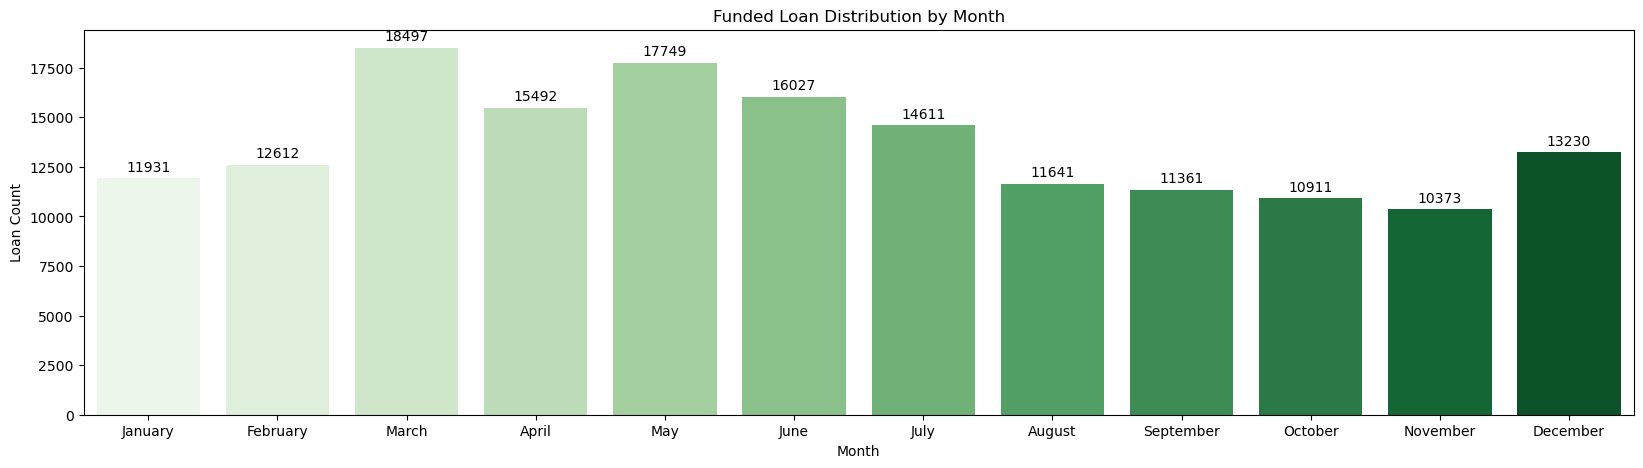

In [48]:
# funded loan
plt.figure(figsize=(20, 5))
fig= sns.barplot( x= funded.index, y=funded.values, palette="Greens",  order= ['January', 'February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Loan Count')
plt.title('Funded Loan Distribution by Month')
for container in fig.containers:
    fig.bar_label(container, padding = 3)

insight:
- puncak pendanaan terjadi pada bulan maret dan mei, dapat diketahui bahwa banyak pinjaman yang mendapatkan pendanaan di awal dan pertengahan tahun
- pendanaan cenderung menurun pada akhir tahun dilihat dari penurunan case pendanaan pada bulan Oktober dan November

Text(0.5, 1.0, 'Funded Loan Distribution by Month')

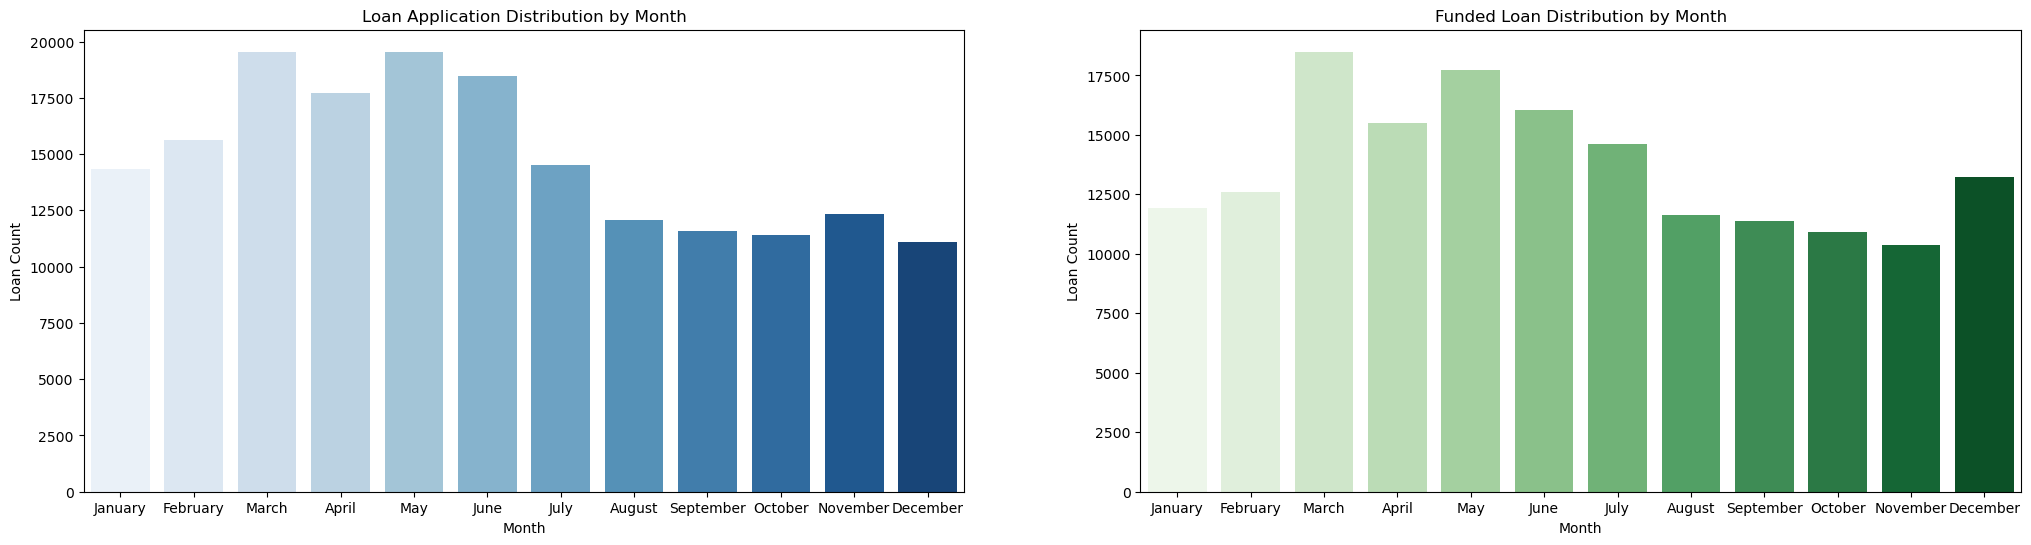

In [49]:
plt.figure(figsize=(25,6))

plt.subplot(1,2,1) # n baris, n kolom, position 1
sns.barplot( x= posted.index, y=posted.values, palette="Blues",  order= ['January', 'February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Loan Count')
plt.title('Loan Application Distribution by Month')

plt.subplot(1,2,2) # n baris, n kolom, position 2
sns.barplot( x= funded.index, y=funded.values, palette="Greens",  order= ['January', 'February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Loan Count')
plt.title('Funded Loan Distribution by Month')


Insight untuk posted loan dan funded loan:
- dari kedua grafik, diketahui bahwa  jumlah case pada setiap bulan untuk pengajuan dan pendanaan pinjaman  tidak jauh berbeda. hal ini berarti untuk setiap case pengajuan pinjaman, pendanaannya diberikan pada bulan yang sama.
- pada bulan desember terdapat kenaikan jumlah case yang diberikan dana, dapat terjadi karena adanya alokasi dana akhir tahun ataupun strategi dari Kiva sendiri

In [50]:
df_agr.tail()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,AGR_terpenuhi,posted_month,funded_month
671199,1340318,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 06:45:02+00:00,NaT,13.0,0,monthly,False,July,NaN
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,NaT,13.0,0,monthly,False,July,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-26 02:09:43+00:00,13.0,1,monthly,True,July,July
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,NaT,13.0,0,monthly,False,July,NaN
671204,1340339,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:31:46+00:00,NaT,13.0,0,monthly,False,July,NaN


In [51]:
# Q5 Top 5 country that receive loans on agri
country5 = df_agr['country'].value_counts().reset_index().head(5)
country5


,country,count
0,Philippines,36776
1,Kenya,31910
2,El Salvador,14009
3,Cambodia,10559
4,Peru,6589


In [52]:
country5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   country  5 non-null      category
 1   count    5 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 2.9 KB


In [53]:
country5['country'] = country5['country'].cat.remove_unused_categories()
country5

,country,count
0,Philippines,36776
1,Kenya,31910
2,El Salvador,14009
3,Cambodia,10559
4,Peru,6589


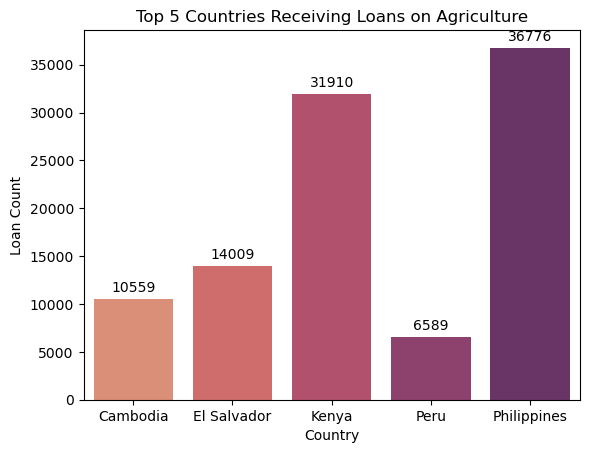

In [54]:
fig = sns.barplot(data= country5,x = 'country', y= 'count', palette= 'flare')
plt.ylabel('Loan Count')
plt.xlabel('Country')
plt.title('Top 5 Countries Receiving Loans on Agriculture')
for container in fig.containers:
    fig.bar_label(container, padding = 3)

insight:
- 5 negara teratas yang paling sering mengambil pinjaman pada sektor agriculture adalah philippines, kenya, el salvador, cambodia, dan peru. philippines merupakan negara yang paling banyak mengambil pinjaman